In [ ]:
#Image Classification using CNN

In [77]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib
#!pip list

In [78]:
import tensorflow as tf
import os

In [79]:
os.path.join('data','happy')

'data\\happy'

In [80]:
os.listdir('data')

['happy', 'sad']

In [81]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [82]:
len(gpus) #gpu is present if the value is 1

1

In [83]:
#to avoid out of memory error by setting gpu memory consumption growth
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [84]:
#remove the dodgy images
import cv2
import imghdr
import matplotlib.pyplot as plt

In [85]:
data_dir = 'data'

In [86]:
image_extn = ['jpg', 'jpeg','bmp','png']

In [87]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [88]:
photo = cv2.imread(os.path.join('data','happy','960x0.jpg'))
photo

array([[[253, 252, 248],
        [253, 252, 248],
        [253, 252, 248],
        ...,
        [255, 253, 253],
        [255, 253, 253],
        [255, 253, 253]],

       [[253, 252, 248],
        [253, 252, 248],
        [253, 252, 248],
        ...,
        [255, 253, 253],
        [255, 253, 253],
        [255, 253, 253]],

       [[253, 252, 248],
        [253, 252, 248],
        [253, 252, 248],
        ...,
        [255, 253, 253],
        [255, 253, 253],
        [255, 253, 253]],

       ...,

       [[ 75, 103, 120],
        [123, 151, 168],
        [133, 161, 178],
        ...,
        [133, 163, 204],
        [135, 163, 204],
        [135, 163, 204]],

       [[ 99, 127, 144],
        [125, 153, 170],
        [123, 151, 168],
        ...,
        [132, 162, 203],
        [134, 162, 203],
        [134, 162, 203]],

       [[130, 158, 175],
        [151, 179, 196],
        [148, 176, 193],
        ...,
        [132, 162, 203],
        [134, 162, 203],
        [134, 162, 203]]

In [89]:
len(photo)

640

In [90]:
photo.shape

(640, 960, 3)

In [91]:
a = imghdr.what(os.path.join('data','happy','960x0.jpg'))
a

'jpeg'

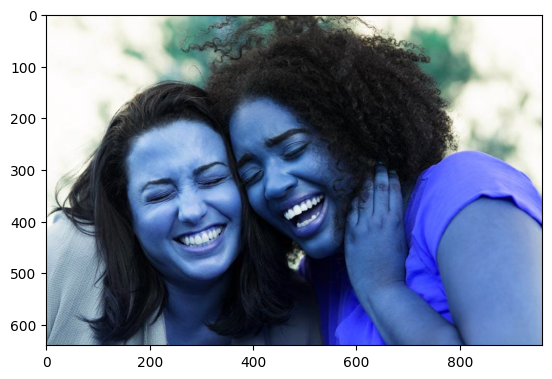

In [92]:
plt.imshow(photo)# cv2 reads the color in bgr, so the color like this

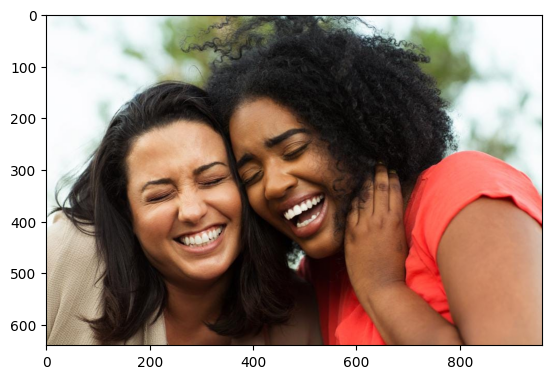

In [93]:
plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
plt.show()

In [94]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extn:
                print('Image is not in ext list {}'.format(image_path))
        except Exception as e:
                print('Issue with image {}'.format(image_path))

In [95]:
#tf.data.Dataset??  #used to create a pipeline instead of losding all to the memory

In [96]:
import numpy as np

In [97]:
#from tensorflow.keras.metrics import binary_focal_crossentropy
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [98]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export('keras.utils.image_dataset_from_directory',
              'keras.preprocessing.image_dataset_from_directory',
              v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
               

In [99]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [100]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [101]:
batch = data_iterator.next()

In [102]:
batch

(array([[[[249.       , 255.       , 248.       ],
          [249.       , 255.       , 248.       ],
          [249.       , 255.       , 248.       ],
          ...,
          [253.       , 253.       , 253.       ],
          [253.       , 253.       , 253.       ],
          [253.       , 253.       , 253.       ]],
 
         [[248.91406  , 255.       , 247.91406  ],
          [248.91406  , 255.       , 247.91406  ],
          [248.91406  , 255.       , 247.91406  ],
          ...,
          [253.17188  , 253.17188  , 253.17188  ],
          [253.17188  , 253.17188  , 253.17188  ],
          [253.17188  , 253.17188  , 253.17188  ]],
 
         [[248.52344  , 255.       , 247.52344  ],
          [248.52344  , 255.       , 247.52344  ],
          [248.52344  , 255.       , 247.52344  ],
          ...,
          [253.95312  , 253.95312  , 253.95312  ],
          [253.95312  , 253.95312  , 253.95312  ],
          [253.95312  , 253.95312  , 253.95312  ]],
 
         ...,
 
         [[ 

In [103]:
len(batch) #images #label

2

In [104]:
#image representation in numpy array
batch[0].shape

(32, 256, 256, 3)

In [105]:
batch[1] #1 = sad 0=happy

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

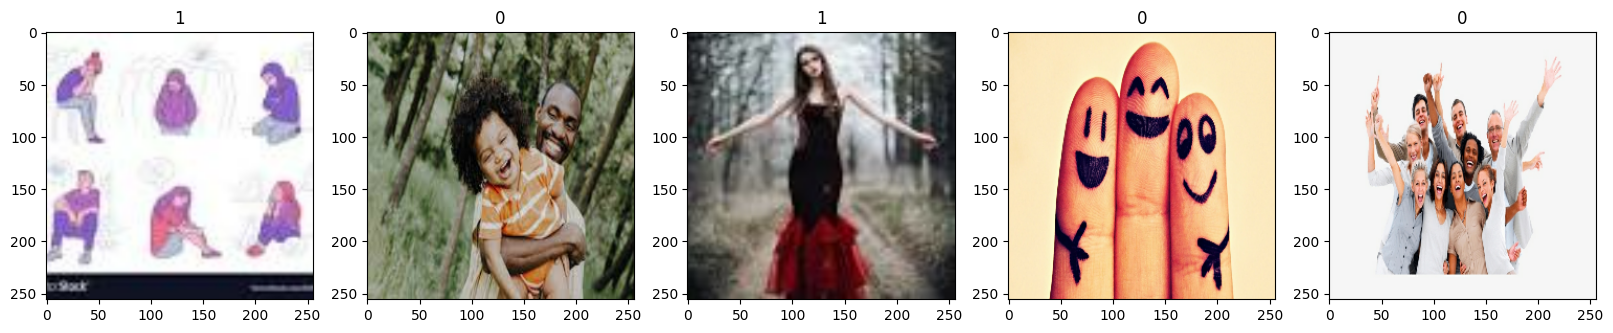

In [106]:
fig, ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate (batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [107]:
#preprocessing the data the 0 to 255 of value  -> 0 to 1 value
data = data.map(lambda x, y : ((x/255), y))

In [108]:
scaled_iterator = data.as_numpy_iterator()

In [109]:
batch = scaled_iterator.next()

In [110]:
batch[0].max()

1.0

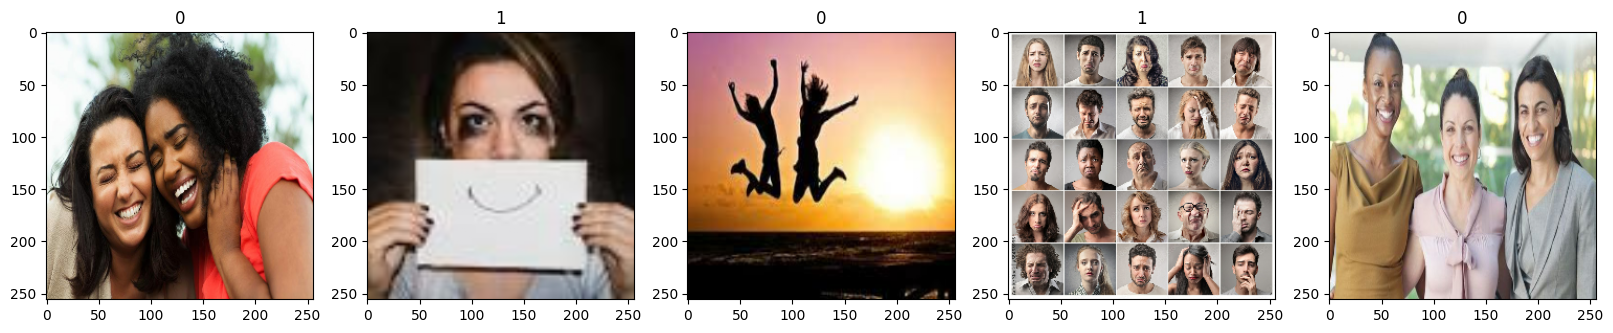

In [111]:
fig, ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate (batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [112]:
len(data)

10

In [142]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)

In [143]:
train_size + val_size + test_size

10

In [144]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [145]:
len(train)

6

In [146]:
#Deep learning starts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [147]:
model = Sequential()

In [148]:
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [149]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [150]:
model.summary() 
#flattern layer is calculated by the last maxpooling layer 30*30*16 = 14400

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [151]:
logdir = 'logs'

In [152]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [153]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 5s 565ms/step - loss: 1.0156 - accuracy: 0.4583 - val_loss: 0.6784 - val_accuracy: 0.6875
Epoch 2/20
6/6 [==============================] - 5s 501ms/step - loss: 0.6798 - accuracy: 0.5208 - val_loss: 0.6385 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 4s 469ms/step - loss: 0.6279 - accuracy: 0.6354 - val_loss: 0.5924 - val_accuracy: 0.7917
Epoch 4/20
6/6 [==============================] - 4s 446ms/step - loss: 0.5130 - accuracy: 0.7604 - val_loss: 0.5572 - val_accuracy: 0.7292
Epoch 5/20
6/6 [==============================] - 4s 452ms/step - loss: 0.5176 - accuracy: 0.7552 - val_loss: 0.4371 - val_accuracy: 0.7396
Epoch 6/20
6/6 [==============================] - 4s 435ms/step - loss: 0.3867 - accuracy: 0.8281 - val_loss: 0.5493 - val_accuracy: 0.6771
Epoch 7/20
6/6 [==============================] - 3s 423ms/step - loss: 0.4213 - accuracy: 0.8073 - val_loss: 0.4062 - val_accuracy: 0.8229
Epoch 8/20
6/6 [====

In [154]:
hist.history

{'loss': [1.015626311302185,
  0.6798274517059326,
  0.6279048919677734,
  0.513029158115387,
  0.5175650715827942,
  0.3866738975048065,
  0.42133185267448425,
  0.3247251808643341,
  0.3005273640155792,
  0.21492521464824677,
  0.16585330665111542,
  0.11285614967346191,
  0.10762175917625427,
  0.10019052773714066,
  0.06436125189065933,
  0.04479405656456947,
  0.03390233591198921,
  0.043709952384233475,
  0.03706826642155647,
  0.03949769213795662],
 'accuracy': [0.4583333432674408,
  0.5208333134651184,
  0.6354166865348816,
  0.7604166865348816,
  0.7552083134651184,
  0.828125,
  0.8072916865348816,
  0.8802083134651184,
  0.90625,
  0.9479166865348816,
  0.9479166865348816,
  0.96875,
  0.9739583134651184,
  0.9635416865348816,
  0.9791666865348816,
  0.9947916865348816,
  0.9947916865348816,
  0.9895833134651184,
  0.9791666865348816,
  0.984375],
 'val_loss': [0.6784377694129944,
  0.6385066509246826,
  0.592377245426178,
  0.5571512579917908,
  0.43712618947029114,
  0.549

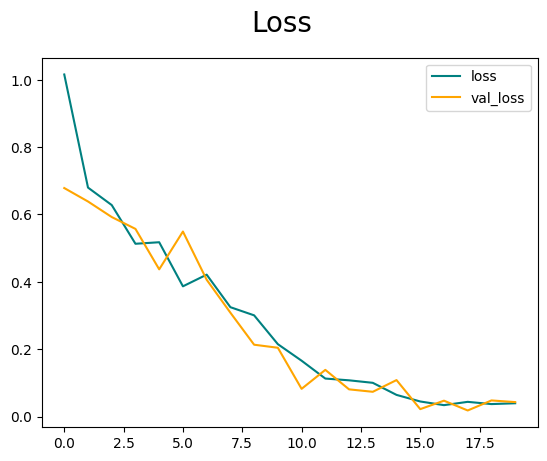

In [155]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc='upper right')
plt.show()

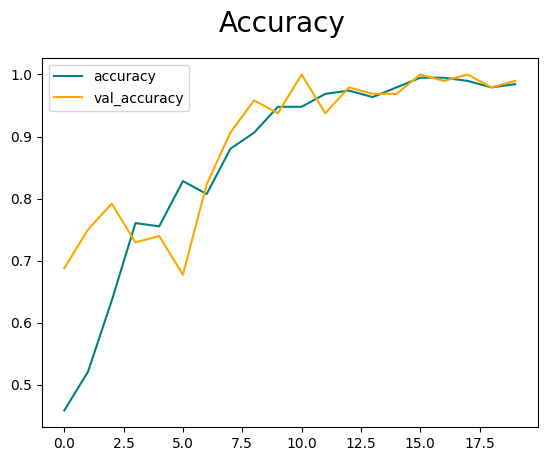

In [156]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [157]:
#evaluate the model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [158]:
pre = Precision()
rec = Recall()
bia = BinaryAccuracy()

In [159]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    bia.update_state(y, yhat)

1/1 [==============================] - 0s 57ms/step


In [160]:
print(f'precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, BinaryAccuracy: {bia.result().numpy()}')

precision: 1.0, Recall: 1.0, BinaryAccuracy: 1.0


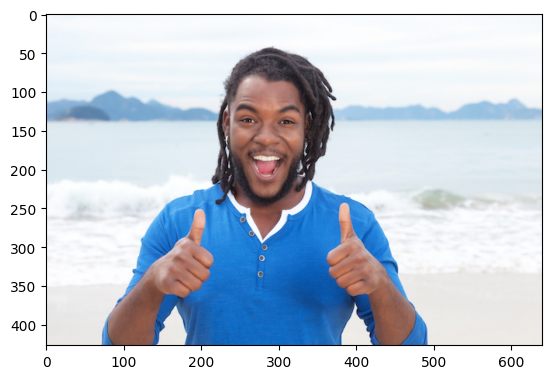

In [161]:
#Test the model
import cv2
test_img = cv2.imread('Happy-Guy.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

In [162]:
resize = tf.image.resize(test_img, (256,256))

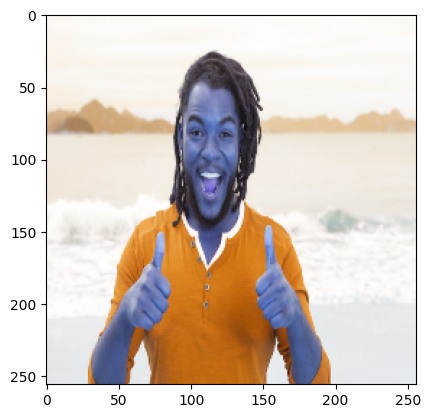

In [163]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [164]:
resize.shape #raw image data

TensorShape([256, 256, 3])

In [165]:
tf.expand_dims(resize, 0).shape #convert the data for the batch size. the 1 is batch for the testing

TensorShape([1, 256, 256, 3])

In [166]:
yhat = model.predict(np.expand_dims(resize/255 , 0))

1/1 [==============================] - 0s 16ms/step


In [167]:
yhat

array([[0.10459882]], dtype=float32)

In [168]:
if (yhat > 0.5):
    print('Predicted class is sad.')
else:
    print('Predicted class is happy.')


Predicted class is happy.


In [169]:
import h5py
from tensorflow.keras.models import load_model
model.save(os.path.join('model','imageclass.h5'))

In [170]:
new_model = load_model(os.path.join('model','imageclass.h5'))

In [171]:
new_yhat = model.predict(np.expand_dims(resize/255 , 0))

1/1 [==============================] - 0s 17ms/step


In [172]:
new_yhat

array([[0.10459882]], dtype=float32)

In [173]:
if (yhat > 0.5):
    print('Predicted class is sad.')
else:
    print('Predicted class is happy.')

Predicted class is happy.
